In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import math
import pandas as pd
import numpy as np
import pickle
import seaborn as sbn
from pymongo import MongoClient
import matplotlib.pyplot as plt

sys.path.append("src/main/python")
from load_data import load

In [3]:
df = load(10000, host = "localhost")
print df.shape
df.head()

100 documents loaded
200 documents loaded
300 documents loaded
400 documents loaded
500 documents loaded
600 documents loaded
700 documents loaded
800 documents loaded
900 documents loaded
1000 documents loaded
1100 documents loaded
1200 documents loaded
1300 documents loaded
1400 documents loaded
1500 documents loaded
1600 documents loaded
1700 documents loaded
1800 documents loaded
1900 documents loaded
2000 documents loaded
2100 documents loaded
2200 documents loaded
2300 documents loaded
2400 documents loaded
2500 documents loaded
2600 documents loaded
2700 documents loaded
2800 documents loaded
2900 documents loaded
3000 documents loaded
3100 documents loaded
3200 documents loaded
3300 documents loaded
3400 documents loaded
3500 documents loaded
3600 documents loaded
3700 documents loaded
3800 documents loaded
3900 documents loaded
4000 documents loaded
4100 documents loaded
4200 documents loaded
4300 documents loaded
4400 documents loaded
4500 documents loaded
4600 documents load

date lang  lang_prob  lat  likes locid locname  long  \
0 2015-10-09 15:18:00   tl   0.857139  NaN      0  None    None   NaN   
1 2015-10-03 23:05:59   ar   0.999998  NaN      3  None    None   NaN   
2 2015-10-01 10:42:47   en   0.999997  NaN      6  None    None   NaN   
3 2015-08-12 17:52:57   ??   0.000000  NaN     11  None    None   NaN   
4 2015-08-14 14:15:14   ??   0.000000  NaN     12  None    None   NaN   

                              mid tags  tags_count  \
0  1092061359292804955_2229281274                0   
1  1087948245658768288_2222155003                0   
2  1086124630688729295_2218635065                0   
3  1050102353617662782_2127917987                0   
4  1051442324355801991_2027900631                0   

                                                text   type         uid  \
0                                        Dragon Ball  image  2229281274   
1  ÿØÿπŸÖ ÿßŸÑÿ≠ÿ≥ÿßÿßÿ®ÿ® ŸÉŸÑŸÉŸÖ ÿπŸÜÿØŸáÿß @Njood0e_506ÿßŸÑŸÉŸÑ ŸÉŸÜÿØŸáÿß...  image  2222155003   
2                           { 1-10-15 } \nhi or hey?  image  2218635065   
3                                                 üòä  video  2127917987   
4                                                     image  2027900631   

                                                 url  \
0  https://scontent.cdninstagram.com/hphotos-xaf1...   
1  https://scontent.cdninstagram.com/hphotos-xaf1...   
2  https://scontent.cdninstagram.com/hphotos-xfa1...   
3  https://scontent.cdninstagram.com/hphotos-xfa1...   
4  https://scontent.cdninstagram.com/hphotos-xaf1...   

                                        text_cleaned  text_length  tag_length  \
0                                        Dragon Ball           11           0   
1  ÿØÿπŸÖ ÿßŸÑÿ≠ÿ≥ÿßÿßÿ®ÿ® ŸÉŸÑŸÉŸÖ ÿπŸÜÿØŸáÿß @Njood0e_506ÿßŸÑŸÉŸÑ ŸÉŸÜÿØŸáÿß...           96           0   
2                           { 1-10-15 } \nhi or hey?           23           0   
3                                                 üòä            2           0   
4                                                               0           0   

   tt_ratio  
0  0.083333  
1  0.010309  
2  0.041667  
3  0.333333  
4  1.000000

??    3792
en    2295
es     456
pt     339
tr     250
de     238
ru     197
it     187
no     156
ko     147
dtype: int64


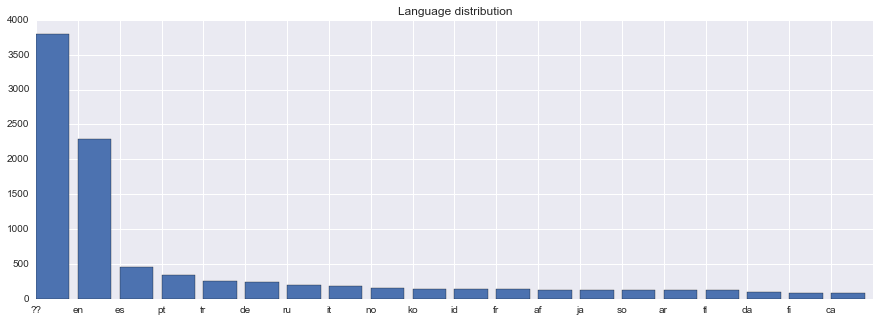

In [4]:
# Language distributions.  Seems like there are alot of unknown
cnts = df["lang"].value_counts()
print cnts[:10]
fig = plt.figure(figsize = (15, 5))
plt.bar(range(20), cnts[:20])
plt.title("Language distribution")
xticks = plt.xticks(range(20), cnts.index[:20])
plt.show()

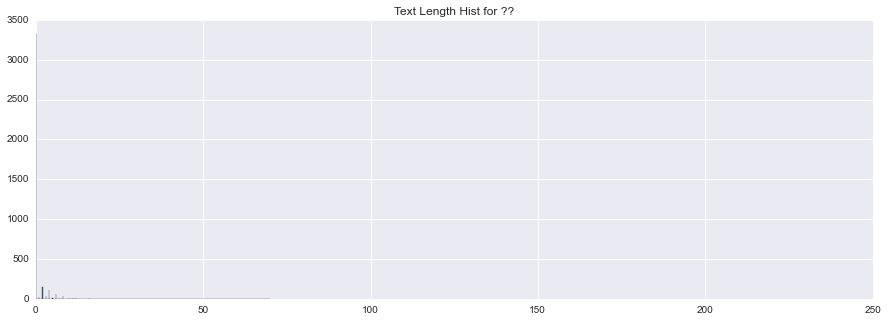

In [5]:
# Show text length distribution for unknown
fig = plt.figure(figsize = (15, 5))
plt.hist(list(df.loc[df["lang"] == "??"]["text_length"]), bins = 1000)
plt.xlim((0, 250))
plt.title("Text Length Hist for ??")
plt.show()

False    9193
True      807
dtype: int64
False    9254
True      746
dtype: int64


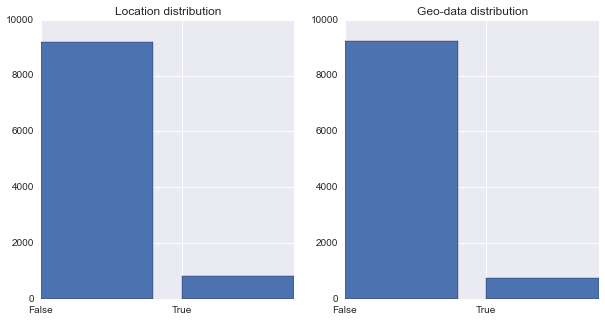

In [6]:
# What is the distribution of posts without locations?
cnts = pd.Series([ x is not None for x in df["locid"]]).value_counts()
print cnts[:10]
fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(1, 2, 1)
ax.bar(range(len(cnts)), cnts)
ax.set_title("Location distribution")
ax.set_xticklabels(cnts.index)
ax.set_xticks([0, 1])

# What is the distribution of posts with geo-data?
cnts = pd.notnull(df["lat"]).value_counts()
print cnts[:10]
ax = plt.subplot(1, 2, 2)
ax.bar(range(len(cnts)), cnts)
ax.set_title("Geo-data distribution")
ax.set_xticklabels(cnts.index)
ax.set_xticks([0, 1])
plt.show()

Text Length Summary Statistics:
count      598.000000
mean       501.441472
std       1506.995984
min          0.000000
25%          5.250000
50%         65.500000
75%        384.000000
max      18355.000000
Name: text_length, dtype: float64

Tag Length Summary Statistics:
count     598.000000
mean      168.876254
std       713.999351
min         0.000000
25%         0.000000
50%         0.000000
75%        23.000000
max      9435.000000
Name: tag_length, dtype: float64

Likes Summary Statistics:
count      598.000000
mean       648.561873
std       2411.231068
min          0.000000
25%          7.000000
50%         37.500000
75%        222.750000
max      26085.000000
Name: likes, dtype: float64

Picture/Video Ratio
count    103.000000
mean      19.692701
std       23.253929
min        0.018182
25%        5.366667
50%       12.500000
75%       22.500000
max       99.000000
Name: img_vid_ratio, dtype: float64

Feed Count
count    598.000000
mean      16.722408
std       24.293292
min  

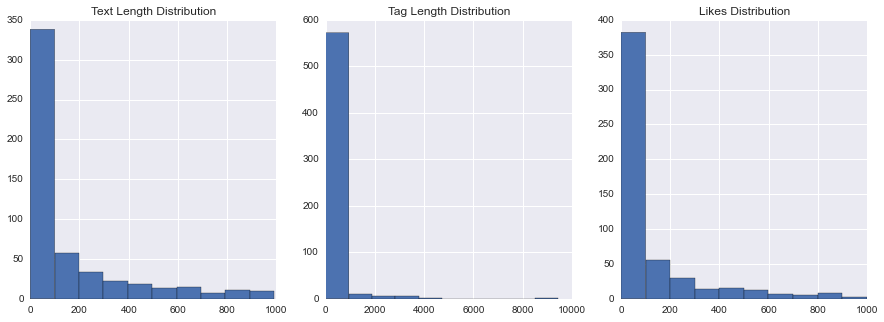

In [7]:
# Get distributions of various text metrics
fig = plt.figure(figsize = (15, 5))

grp = df.groupby("uid")
df_user = grp.sum()
df_user["post_cnt"] = grp.count()["mid"]
df_user["img_cnt"] = df.loc[df["type"] == "image"].groupby("uid").count()["type"]
df_user["vid_cnt"] = df.loc[df["type"] == "video"].groupby("uid").count()["type"]
df_user["img_vid_ratio"] = df_user["img_cnt"].astype(np.float) / df_user["vid_cnt"]

print "Text Length Summary Statistics:"
print df_user["text_length"].describe()
print
ax = plt.subplot(1, 3, 1)
ax.hist(list(df_user.loc[df_user["text_length"] < 1000]["text_length"]))
ax.set_title("Text Length Distribution")

print "Tag Length Summary Statistics:"
print df_user["tag_length"].describe()
print
ax = plt.subplot(1, 3, 2)
ax.hist(list(df_user["tag_length"]))
ax.set_title("Tag Length Distribution")

print "Likes Summary Statistics:"
print df_user["likes"].describe()
print
ax = plt.subplot(1, 3, 3)
ax.hist(list(df_user.loc[df_user["likes"] < 1000]["likes"]))
ax.set_title("Likes Distribution")

print "Picture/Video Ratio"
print df_user["img_vid_ratio"].describe()
print

print "Feed Count"
print df_user["post_cnt"].describe()

In [8]:
# Find the closest airport

airports_df = pd.read_csv("src/main/resources/airports.dat", sep=":")
airports_df = airports_df.loc[airports_df['LongDir'] == 'U']
airports_df.loc[airports_df['LongDir'] == 'U', 'Long'] = -airports_df['Long']
airports_df.loc[airports_df['LatDir'] == 'S', 'Lat'] = -airports_df['Lat']
airports_df = airports_df.loc[:, ["Airport", "City", "Lat", "Long"]]
print airports_df.shape
print airports_df.loc[airports_df['City'] == 'USA'].head()

def closest_airport(r):
    res = pd.Series()
    if pd.notnull(r['lat']) and pd.notnull(r['long']):
        x = pd.Series([ math.sqrt((r['lat']-x['Lat'])**2 + (r['long']-x['Long'])**2) for i,x in airports_df.iterrows() ])
        res = airports_df.iloc[x.idxmin(), :]
    return res

# We define a city to be a place that has an airport, so do some additional work to attach a location to
# the nearest airport
df[["airport", "city", "city_lat", "city_long"]] = df.apply(closest_airport, axis=1)
print df.shape

(6910, 4)
            Airport City  Lat  Long
KABI        ABILENE  USA   32   -99
KABQ    ALBUQUERQUE  USA    0     0
KACK      NANTUCKET  USA   41   -70
KACT           WACO  USA   31   -97
KACY  ATLANTIC CITY  USA   39   -74
(10000, 23)


MONT-DE-MARSAN    99
VALENCIA          68
LONDON            60
CANTON ISLAND     49
ADRAR             47
dtype: int64
FRANCE     148
USA        126
ENGLAND     94
SPAIN       84
ALGERIA     83
dtype: int64


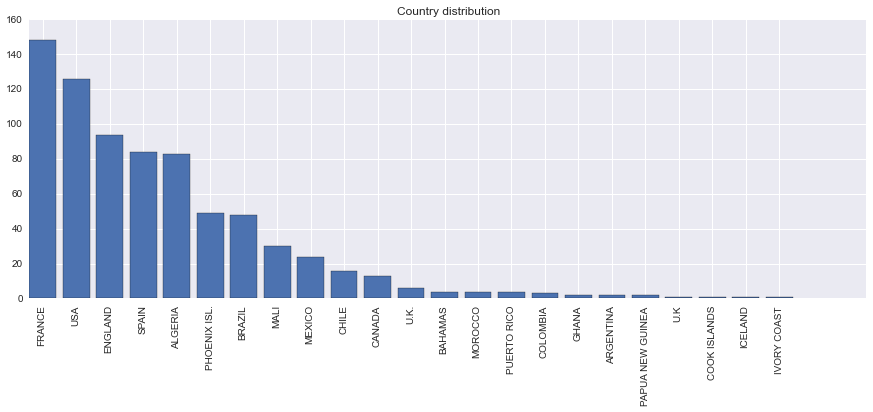

AssertionError: incompatible sizes: argument 'height' must be length 100 or scalar

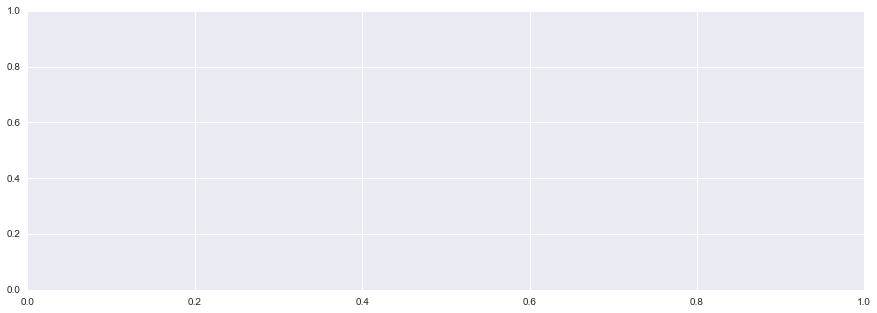

In [9]:
# What are the top cities/airports?
print df['airport'].value_counts().head()
print df['city'].value_counts().head()

# Country distributions.
cnts = df["city"].value_counts()
fig = plt.figure(figsize = (15, 5))
plt.bar(range(len(cnts)), cnts)
plt.title("Country distribution")
xticks = plt.xticks([ x + 0.4 for x in range(len(cnts)) ], cnts.index, rotation = 'vertical')
plt.show()

# Airport Distributions in the US
cnts = df.loc[df['city'] == 'USA']['airport'].value_counts()
fig = plt.figure(figsize = (15, 5))
plt.bar(range(100), cnts[:100])
plt.title("Airport distributions")
xticks = plt.xticks([ x + 0.4 for x in range(100) ], cnts.index[:100], rotation = 'vertical')
plt.show()

In [ ]:
sbn.pairplot(df.loc[(df["city"] == "USA") | (df["city"] == "FRANCE") | (df["city"] == "ENGLAND") | (df["city"] == "SPAIN"), ["city", "likes", "text_length", "tag_length"]], hue="city")
plt.show()

## TFIDF Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert our text into features
# Create our bag of words
df['tags_cleaned'] = [ ' '.join([ 'tag:'+y for y in x.split(' ') if len(x.strip()) > 0 ]) for x in df['tags'] ]
df['bow'] = [ x['text_cleaned'] + ' ' + x['tags_cleaned'] for i,x in df.iterrows() ]

# Let's play with only english language captions for now
en_df = df.loc[(df["lang"] == "en") | (df["lang"] == "??")]
en_df.loc[[ len(x.strip()) > 0 for x in en_df['bow']], ["bow", "airport"]].head()

# Generate a dataset that doesn't group users
# We are only interested in stuff with locations
tfidf = TfidfVectorizer(stop_words='english', norm='l2', ngram_range=[1,2])
df_bow = en_df.loc[[ x is not None for x in en_df['airport'] ]]
Y_bow = tfidf.fit_transform(en_df['bow'])
Y_loc = en_df['airport']

# Group our posts by userid and combine the bow and locations into a single feature
data = { 'uid': [], 'bow': [], 'loc': [] }
for k,vs in en_df.groupby('uid').groups.iteritems():
    locs = [ '%s:%d' % (k,v) for k,v in dict(en_df.loc[vs]['airport'].value_counts()).items() ]
    # We are only interested in users with at least one location
    if len(locs) > 0:
        data['uid'].append(k)
        data['loc'].append('|'.join(locs))
        data['bow'].append(' '.join(en_df.loc[vs]['bow']))

df_user_bow = pd.DataFrame(data)
df_user_bow = df_user_bow.loc[[ len(x.strip()) > 0 for x in df_user_bow['bow'] ]]

tfidf_user = TfidfVectorizer(stop_words='english', norm='l2', ngram_range=[1,2])
Y_user_bow = tfidf_user.fit_transform(df_user_bow['bow'])
Y_user_loc = df_user_bow['loc']

print "Post BOW Dataset"
print Y_bow.shape
print df_bow.head()
                   
print "User BOW Dataset"
print Y_user_bow.shape
print df_user_bow.head()

Post BOW Dataset
(96208, 304411)
                 date lang  lang_prob  lat  likes locid locname  long  \
2 2015-10-01 10:42:47   en   0.999996  NaN      6  None    None   NaN   
3 2015-08-12 17:52:57   ??   0.000000  NaN     11  None    None   NaN   
4 2015-08-14 14:15:14   ??   0.000000  NaN     12  None    None   NaN   
5 2015-08-14 14:12:34   ??   0.000000  NaN      6  None    None   NaN   
6 2015-08-13 17:56:27   ??   0.000000  NaN      6  None    None   NaN   

                              mid tags            ...              \
2  1086124630688729295_2218635065                 ...               
3  1050102353617662782_2127917987                 ...               
4  1051442324355801991_2027900631                 ...               
5  1051440982514066267_2027900631                 ...               
6  1050828890643751248_2027900631                 ...               

               text_cleaned text_length tag_length  tt_ratio airport city  \
2  { 1-10-15 } \nhi or hey?         

## KMeans Model Training

In [226]:
from sklearn.cluster import KMeans

# Use KMeans to try and cluster our results
k_clusters = 100
m_km = KMeans(k_clusters)
Y_clusters = m_km.fit_predict(Y_user_bow)

print "Training KMeans using %d clusters" % k_clusters
print df_user_bow.shape
df_user_bow['cluster'] = Y_clusters

Y_user_loc = []
# Accumulate all of the locations for each cluster
for cid in pd.unique(df_user_bow['cluster']):
    locations = {}
    line = '|'.join(df_user_bow.loc[df_user_bow['cluster'] == cid]['loc'])
    for z in [ x.strip() for x in line.split('|') if len(x.strip()) > 0 ]:
        k,v = z.split(':')
        k = k.replace('.', '')
        if k not in locations:
            locations[k] = 0
        locations[k] = locations[k] + int(v)
    Y_user_loc.append({ 'cid': cid, 'locations': locations })

# Visualize the cluster distribution and show a sample of captions in each cluster
plt.bar(range(k_clusters), pd.Series(Y_clusters).value_counts())
plt.title("Cluster distribution")
plt.show()
    
print '-' * 80
for i,cid in enumerate(pd.unique(df_bow['cluster'])):
    print "-- Cluster %d: N=%f" % (int(cid), df_bow.loc[df_bow['cluster'] == cid].shape[0])
    print df_bow.loc[df_bow['cluster'] == cid][:10]
    print "-- Cluster Record: " + str(Y_loc[i])
    print

Training KMeans using 100 clusters
(3329, 4)


In [ ]:
# Save off our kmeans model
host = "localhost"
port = 27017
db = "instagram"
coll = "text"

client = MongoClient(host, port)
mongo = client[db][coll]

for r in Y_loc:
    mongo.update_one({ '_id': r['cid'] }, { '$set': r }, upsert = True)
print "Saved location records"
    
tfidf_path = "tfidf.pickle"
km_path = "km.pickle"
with open(tfidf_path, 'w') as f_tfidf, open(km_path, 'w') as f_km:
    pickle.dump(tfidf_user, f_tfidf)
    pickle.dump(km, f_km)
    print "Saved tfidf and km models"
    
mongo.close()

## KNN Model Training

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, confusion_matrix

# Alternatively, we might want to try using KNN as a model
k_nn = 100
m_nn = NearestNeighbors(k_nn)
m_nn.fit(Y_bow, Y_loc)

# TODO use test set here
Y_pred = m_nn.kneighbors(Y_bow)
Y_truth = Y_loc

print "Pred shape: " + str(len(Y_pred))
print "Truth shape: " + str(len(Y_truth))

# Evaluate the results
print accuracy_score(Y_truth, Y_pred)
print confusion_matrix(Y_truth, Y_pred)

In [236]:
# Save off our knn model
tfidf_path = "tfidf.pickle"
knn_path = "knn.pickle"
with open(tfidf_path, 'w') as f_tfidf, open(knn_path, 'w') as f_knn:
    pickle.dump(tfidf, f_tfidf)
    pickle.dump(knn, f_knn)
    print "Saved tfidf and knn models"

(3329, 336691)

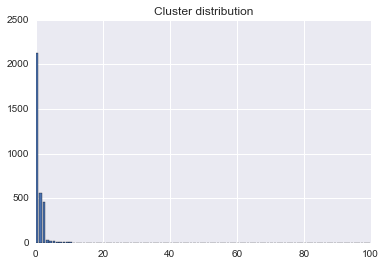

--------------------------------------------------------------------------------
-- Cluster 94: N=1.000000
                                                 bow loc        uid  cluster
0  My Real Eyes, Realize, Real Lies üîÆ  I don't c...      222735081       94
-- Cluster Record: {'locations': {}, 'cid': 94}

-- Cluster 4: N=554.000000
                                                   bow  \
1    My new car   hard work pays off üòÇüòÑ tag:musta...   
16   2Âπ¥Ë®òÂøµÊó•„Åß„Åó„ÅüüçÅ\n----------------------------------...   
22   ~b a star~   #BowTie  #UnisexFashion  #MenAcce...   
45                 Follow and like here pics \n@emb...   
50   ‚ù§Ô∏è    Che frittura tag:noncelafacciopiu tag:fr...   
64       Happy New Year ‚òÜ‚òÜ              üêç üêç üåü üåü...   
74   Kinda late post but whatever, spend the day wi...   
100  My beauty having fun ‚ò∫Ô∏è  Her face üòÑ    Photo ...   
102  üé∂üéµ‚Ä¢Digging like you can bury something that ...   
130    what amazing place \n   ta

In [227]:
# Visualize the cluster distribution and show a sample of captions in each cluster
plt.bar(range(k_clusters), pd.Series(Y_clusters).value_counts())
plt.title("Cluster distribution")
plt.show()
    
print '-' * 80
for i,cid in enumerate(pd.unique(df_bow['cluster'])):
    print "-- Cluster %d: N=%f" % (int(cid), df_bow.loc[df_bow['cluster'] == cid].shape[0])
    print df_bow.loc[df_bow['cluster'] == cid][:10]
    print "-- Cluster Record: " + str(Y_loc[i])
    print

In [83]:
import requests
import time

url = "http://119.81.249.157:3000/resources/1"
rate_limit = 5000
wait_secs = float(rate_limit) / (60*60)

with open("src/main/resources/synset.lst") as f_vocab:
    vocab = dict(enumerate(f_vocab.readlines()))

data = {}
for xs in df_img.groupby('uid').groups.itervalues():
    d = {}
    for i,y in df_img.iloc[xs].iterrows():
        data[y['mid']] = y['url']
    r = requests.post(url, json=d).json()
    d = {}
    for k,v in [ (k.split(' ')[0],v) for k,v in r.json().iterkeys() if ' ' in k ]:
        d[vocab[k]] = v
    data.append(d)
    time.sleep(wait_secs)

df_img = pd.DataFrame(data)
print df_img.shape
df_img.head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)